In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
import time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder , OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.neural_network import MLPClassifier

In [4]:
df=pd.read_csv('Desktop/2nd Sem/ML/Projects 1/sgemm_product_dataset/sgemm_product.csv')

In [5]:
df = df.iloc[0:50000, :]
df['avg']=df.iloc[:,14:].mean(axis=1)
df.drop(['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'],axis=1,inplace=True)
df['avg_med']=df['avg'].median()
df.loc[df['avg']>= df['avg_med'],'avg_med']=1
df.loc[df['avg']< df['avg_med'],'avg_med']=0
df.drop(['avg'],axis=1,inplace=True)

In [6]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg_med
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [7]:
# Data split in test and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,0:14],df['avg_med'] , test_size=0.3, random_state=100)

#scaling data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# KNN###

In [8]:
# Varying the "p" value - Distance Metric 
p = np.arange(1,5,1)
acc_train_dist = []
acc_test_dist = []
for i in p:
    KNN_class = KNeighborsClassifier(n_neighbors=5 , p = i)
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_dist.append(accuracy_score(y_train,y_pred_train))
    acc_test_dist.append(accuracy_score(y_test,y_pred_test))

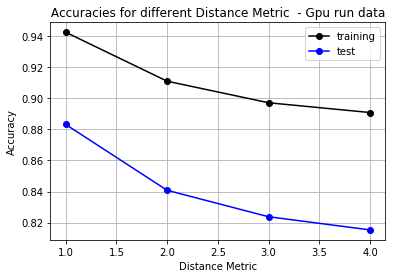

In [9]:
## Plotting the graph for different p values vs accuracy
plt.plot(p,acc_train_dist,marker='o',markersize=6,color='Black',label='training')
plt.plot(p,acc_test_dist,marker='o',markersize=6,color='Blue',label='test')
plt.title(" Accuracies for different Distance Metric  - Gpu run data ")
plt.xlabel("Distance Metric")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [11]:
# Varying the Neighbor values in the classifier for p=1
n_neighbors = np.arange(1,20,1)
acc_train_neighbor = []
acc_test_neighbor = []
for i in n_neighbors:
    KNN_class = KNeighborsClassifier(n_neighbors=i , p = 1)
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_neighbor.append(accuracy_score(y_train,y_pred_train))
    acc_test_neighbor.append(accuracy_score(y_test,y_pred_test))
    

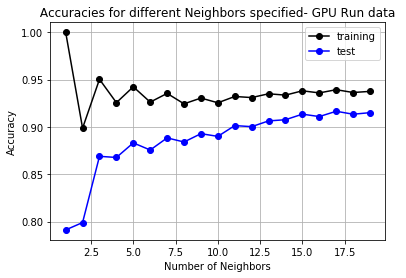

In [12]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(n_neighbors,acc_train_neighbor,marker='o',markersize=6,color='black',label='training')
plt.plot(n_neighbors,acc_test_neighbor,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Neighbors specified- GPU Run data ")
plt.xlabel("Number of Neighbors")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
n_neighbors = np.arange(1,20,1)
acc_train_neighbor = []

for i in n_neighbors:
    KNN_class = KNeighborsClassifier(n_neighbors=i , p = 1)
    KNN_class.fit(x_train, y_train)
    y_pred = KNN_class.predict(x_test)
    Acc_Score = accuracy_score(y_test, y_pred)
    acc_train_neighbor.append(Acc_Score)
    print(i+1,"th Iteration with Acc_Score",Acc_Score)

2 th Iteration with Acc_Score 0.7912
3 th Iteration with Acc_Score 0.799
4 th Iteration with Acc_Score 0.8689333333333333
5 th Iteration with Acc_Score 0.8677333333333334
6 th Iteration with Acc_Score 0.8831333333333333
7 th Iteration with Acc_Score 0.8756
8 th Iteration with Acc_Score 0.8884
9 th Iteration with Acc_Score 0.8840666666666667
10 th Iteration with Acc_Score 0.8928666666666667
11 th Iteration with Acc_Score 0.89
12 th Iteration with Acc_Score 0.9014
13 th Iteration with Acc_Score 0.9002666666666667
14 th Iteration with Acc_Score 0.9063333333333333
15 th Iteration with Acc_Score 0.9076
16 th Iteration with Acc_Score 0.9134666666666666
17 th Iteration with Acc_Score 0.9109333333333334
18 th Iteration with Acc_Score 0.9165333333333333
19 th Iteration with Acc_Score 0.9134
20 th Iteration with Acc_Score 0.9150666666666667


In [14]:
# Varying the "weight" parameter
weight = ['uniform','distance']
acc_train_weight = []
acc_test_weight = []
for i in range(len(weight)):
    KNN_class = KNeighborsClassifier(n_neighbors=18 , p = 1,weights = weight[i] )
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_weight.append(accuracy_score(y_train,y_pred_train))
    acc_test_weight.append(accuracy_score(y_test,y_pred_test))

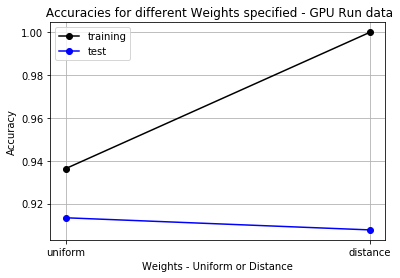

In [15]:
## Plotting the graph for the different Neighbors with p=1 
plt.plot(weight,acc_train_weight,marker='o',markersize=6,color='black',label='training')
plt.plot(weight,acc_test_weight,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Weights specified - GPU Run data")
plt.xlabel("Weights - Uniform or Distance")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
# Varying the "algorithm" parameter
algo = ['auto','ball_tree','kd_tree','brute']
acc_train_algo = []
acc_test_algo = []
for i in algo:
    KNN_class = KNeighborsClassifier( algorithm= i ,p=1,n_neighbors=18 )
    KNN_class.fit(x_train, y_train)
    y_pred_train = KNN_class.predict(x_train)
    y_pred_test = KNN_class.predict(x_test)
    acc_train_algo.append(accuracy_score(y_train,y_pred_train))
    acc_test_algo.append(accuracy_score(y_test,y_pred_test))

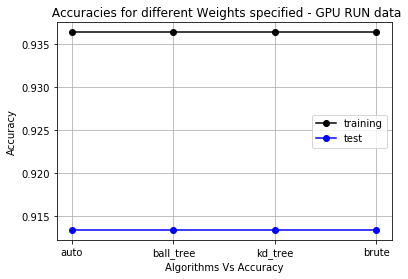

In [17]:
## Plotting the graph for the different Neighbors with p=2 
plt.plot(algo,acc_train_algo,marker='o',markersize=6,color='black',label='training')
plt.plot(algo,acc_test_algo,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Weights specified - GPU RUN data")
plt.xlabel("Algorithms Vs Accuracy")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
### building the classifier
KNN_class = KNeighborsClassifier(n_neighbors=18 , p = 1  )
KNN_class.fit(x_train, y_train)

### predicting the test set result
y_pred = KNN_class.predict(x_test)

### Finding the accuracy
Acc_Score = accuracy_score(y_test, y_pred)
print("Accuracy score is",Acc_Score)

### create confusion matrix
con_mat = confusion_matrix(y_test , y_pred)
print(con_mat)



Accuracy score is 0.9134
[[7068  446]
 [ 853 6633]]


K-fold accuracy score is  0.9127140269504161


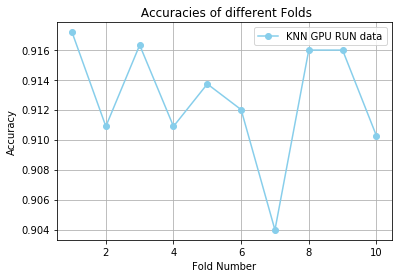

In [19]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = KNN_class, X = x_train, y = y_train, cv = 10)
mean_acc_1 = accuracies_1.mean()
print("K-fold accuracy score is ",mean_acc_1)

plt.plot(np.arange(1,11,1),accuracies_1,marker = 'o' , markersize = 6 , color = 'skyblue',label='KNN GPU RUN data')
plt.title(" Accuracies of different Folds")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# ANN

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


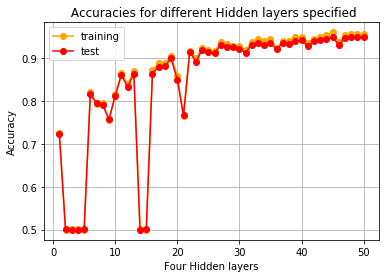

44

In [20]:
neurons = 1
acc_train_layers = []
acc_test_layers = []
hidden_layers = []
for j in range(1,11):
    hidden = []
    for i in range(1,6):
        hidden.append(neurons)
        ANN_class = MLPClassifier(hidden_layer_sizes= hidden,
                              activation='relu',
                              alpha=0.0001,
                              batch_size='auto' ,
                              solver= 'adam',
                              learning_rate= 'constant',
                              max_iter = 400,
                              random_state= 0 )
        ANN_class.fit(x_train, y_train)
        y_pred_train = ANN_class.predict(x_train)
        y_pred_test = ANN_class.predict(x_test)
        acc_train_layers.append(accuracy_score(y_train,y_pred_train))
        acc_test_layers.append(accuracy_score(y_test,y_pred_test))
    neurons += 1
 
 
## Plotting the graph for the different hidden layer neurons
plt.plot(list(range(1,51)),acc_train_layers,marker='o',markersize=6,color='orange',label='training')
plt.plot(list(range(1,51)),acc_test_layers,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Hidden layers specified")
plt.xlabel("Four Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()
 
acc_train_layers.index(max(acc_train_layers))

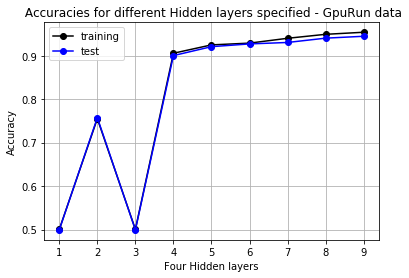

In [21]:
from sklearn.neural_network import MLPClassifier

## Expermineting with differnet neurons in hidden layers
layer_size = np.arange(1,10,1)
acc_train_layers = []
acc_test_layers = []
for i in layer_size:
    ANN_class = MLPClassifier(hidden_layer_sizes= (i,i,i,i),
                          activation='relu', 
                          alpha=0.0001, 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = 400,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_layers.append(accuracy_score(y_train,y_pred_train))
    acc_test_layers.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(layer_size,acc_train_layers,marker='o',markersize=6,color='black',label='training')
plt.plot(layer_size,acc_test_layers,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Hidden layers specified - GpuRun data")
plt.xlabel("Four Hidden layers")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


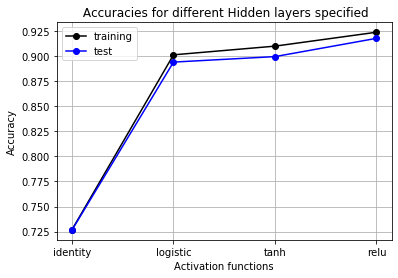

In [22]:
## Expermineting with differnet activation functions
function = ['identity', 'logistic', 'tanh', 'relu']
acc_train_func = []
acc_test_func = []
for i in function:
    ANN_class = MLPClassifier(hidden_layer_sizes= (5,5,5,5),
                          activation= i , 
                          alpha=0.0001, 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = 200,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_func.append(accuracy_score(y_train,y_pred_train))
    acc_test_func.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(function,acc_train_func,marker='o',markersize=6,color='black',label='training')
plt.plot(function,acc_test_func,marker='o',markersize=6,color='blue',label='test')
plt.title(" Accuracies for different Hidden layers specified")
plt.xlabel("Activation functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

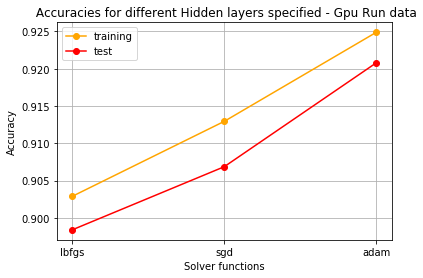

In [23]:
## Expermineting with differnet solver functions
types = ['lbfgs', 'sgd', 'adam']
acc_train_type = []
acc_test_type = []
for i in types:
    ANN_class = MLPClassifier(hidden_layer_sizes= (5,5,5,5),
                          activation= 'relu' , 
                          solver = i ,
                          alpha=0.0001, 
                          batch_size='auto' ,
                          learning_rate= 'constant',
                          max_iter = 500,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_type.append(accuracy_score(y_train,y_pred_train))
    acc_test_type.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot(types,acc_train_type,marker='o',markersize=6,color='orange',label='training')
plt.plot(types,acc_test_type,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Hidden layers specified - Gpu Run data")
plt.xlabel("Solver functions")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

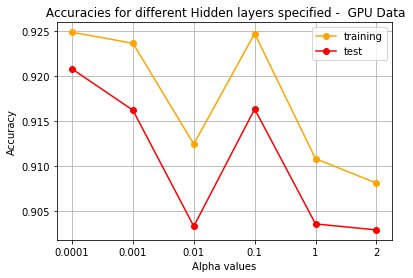

In [24]:
## Expermineting with differnet Alpha values
values = [0.0001,0.001,0.01,0.1,1,2]
acc_train_values = []
acc_test_values = []
for i in values:
    ANN_class = MLPClassifier(hidden_layer_sizes= (5,5,5,5),
                          activation= 'relu' , 
                          alpha = i , 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = 500,
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    acc_train_values.append(accuracy_score(y_train,y_pred_train))
    acc_test_values.append(accuracy_score(y_test,y_pred_test))
    
## Plotting the graph for the different hidden layer neurons 
plt.plot([str(i) for i in values],acc_train_values,marker='o',markersize=6,color='orange',label='training')
plt.plot([str(i) for i in values],acc_test_values,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies for different Hidden layers specified -  GPU Data")
plt.xlabel("Alpha values")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [25]:
## Expermineting with differnet iterations
iteration = range(200,2000,100)
itr_train_values = []
itr_test_values = []
for i in range(len(iteration)):
    ANN_class = MLPClassifier(hidden_layer_sizes= (5,5,5,5),
                          activation= 'relu' , 
                          alpha = 0.1 , 
                          batch_size='auto' ,
                          solver= 'adam',
                          learning_rate= 'constant',
                          max_iter = iteration[i],
                          random_state= 0 )
    ANN_class.fit(x_train, y_train)
    y_pred_train = ANN_class.predict(x_train)
    y_pred_test = ANN_class.predict(x_test)
    itr_train_values.append(accuracy_score(y_train,y_pred_train))
    itr_test_values.append(accuracy_score(y_test,y_pred_test))
    


/Users/sampathgubbala/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


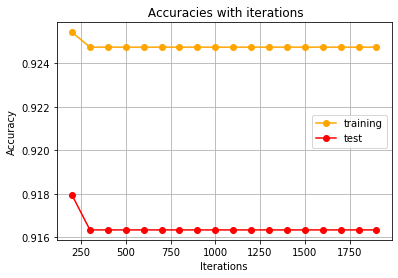

In [26]:
## Plotting the graph for the different hidden layer neurons 
plt.plot(iteration,itr_train_values,marker='o',markersize=6,color='orange',label='training')
plt.plot(iteration,itr_test_values,marker='o',markersize=6,color='red',label='test')
plt.title(" Accuracies with iterations")
plt.xlabel("Iterations")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [27]:
# Building the final classifier
ANN_class_Energy = MLPClassifier(hidden_layer_sizes= (5,5,5,5),
                          activation='relu',  
                          batch_size='auto' ,
                          solver= 'adam',
                          alpha = 0.0001,
                          learning_rate= 'constant',
                          max_iter= 500,
                          random_state= 0 )

ANN_class_Energy.fit(x_train, y_train)

### predicting the test set result
y_pred_E = ANN_class_Energy.predict(x_test)
y_test

### Finding the accuracy
Result_E = accuracy_score(y_test,y_pred_E)
print("Accuracy is",Result_E)

### create confusion matrix
cm_E = confusion_matrix(y_test,y_pred_E)
print(cm_E)



Accuracy is 0.9208
[[6940  574]
 [ 614 6872]]


In [28]:
from sklearn.model_selection import cross_val_score
accuracies_1 = cross_val_score(estimator = ANN_class_Energy, X = x_train, y = y_train, cv = 10)
mean_acc_1 = accuracies_1.mean()
print("Gpu run data accuracy is ",mean_acc_1)



Gpu run data accuracy is  0.9174857171801751


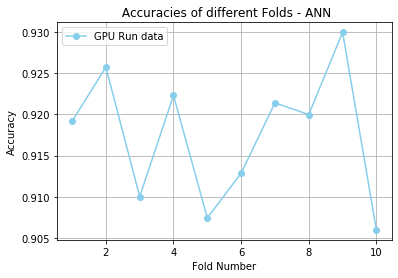

In [29]:
plt.plot(np.arange(1,11,1),accuracies_1,marker = 'o' , markersize = 6 , color = 'skyblue',label='GPU Run data')
plt.title(" Accuracies of different Folds - ANN")
plt.xlabel("Fold Number")
plt.grid()
plt.ylabel("Accuracy")
plt.legend()
plt.show()